In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import zipfile

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
zf_train = zipfile.ZipFile('../input/nyc-taxi-trip-duration/train.zip')
nyc_data = pd.read_csv(zf_train.open('train.csv'))

zf_test = zipfile.ZipFile('../input/nyc-taxi-trip-duration/test.zip')
test = pd.read_csv(zf_test.open('test.csv'))

In [3]:
nyc_data.shape

(1458644, 11)

In [4]:
nyc_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
nyc_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
# Converting to datetime
nyc_data['pickup_datetime'] = pd.to_datetime(nyc_data['pickup_datetime'])
nyc_data['dropoff_datetime'] = pd.to_datetime(nyc_data['dropoff_datetime'])

# Extracting additional info
nyc_data['pickup_hour'] = nyc_data['pickup_datetime'].dt.hour
nyc_data['pickup_day'] = nyc_data['pickup_datetime'].dt.day
nyc_data['pickup_month'] = nyc_data['pickup_datetime'].dt.month
nyc_data['pickup_weekday'] = nyc_data['pickup_datetime'].dt.weekday


nyc_data['drop_hour'] = nyc_data['dropoff_datetime'].dt.hour
nyc_data['drop_day'] = nyc_data['dropoff_datetime'].dt.day
nyc_data['drop_month'] = nyc_data['dropoff_datetime'].dt.month
nyc_data['drop_weekday'] = nyc_data['dropoff_datetime'].dt.weekday

we dont care about the minuts or secondes

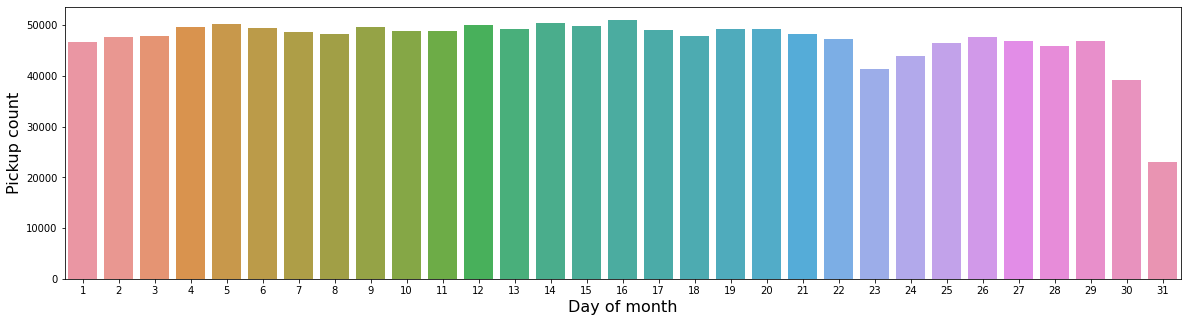

In [8]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_day', data=nyc_data)
plt.xlabel('Day of month', fontsize=16)
plt.ylabel('Pickup count', fontsize=16)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

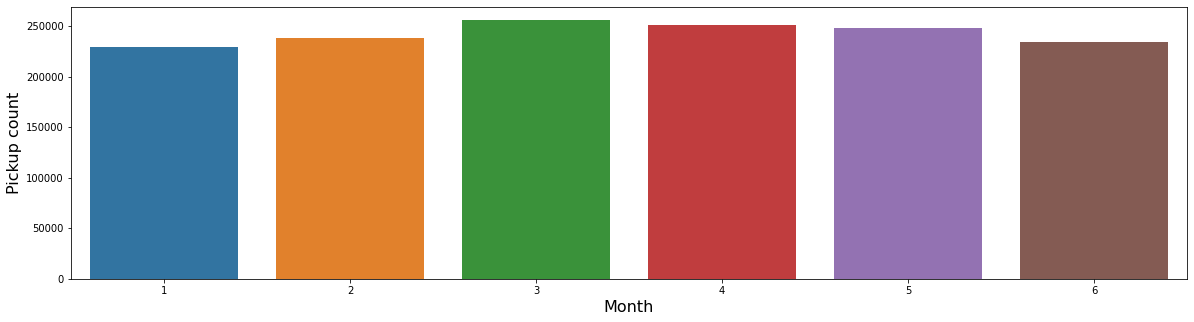

In [9]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='pickup_month', data=nyc_data)
plt.xlabel('Month', fontsize=16 )
plt.ylabel('Pickup count', fontsize=16)
plt.show